In [2]:
import tweepy
import pandas as pd

In [3]:
#API key removed for GITHUB
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""


In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
nbre_of_tweets = 100
tweets=[]
likes=[]
time=[]


In [6]:
for i in tweepy.Cursor(api.user_timeline, id='NASA', tweet_mode="extended").items(nbre_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
df = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})
df


,tweets,likes,time
0,"No matter where on Earth you are, it's time fo...",1547,2021-12-21 15:49:01
1,We don’t yet know what @NASAWebb will uncover....,1823,2021-12-21 14:05:52
2,Stage separation confirmed! The @SpaceX Dragon...,6437,2021-12-21 10:22:31
3,@GHCArmy 🎁 It is! The @Space_Station crew will...,81,2021-12-21 10:14:14
4,The @SpaceX #CRS24 Cargo Dragon successfully l...,2685,2021-12-21 10:10:07
...,...,...,...
95,Congratulations to the #IXPE team on a success...,3300,2021-12-09 07:12:26
96,@Buccatty @SpaceX We love sharing space with y...,19,2021-12-09 07:12:06
97,"@rocketmunkey For sure! This might help, thoug...",12,2021-12-09 07:06:22
98,Separation confirmed! #IXPE is flying free fro...,6411,2021-12-09 06:40:24


In [7]:
#Enlever les RT
df = df[~df.tweets.str.contains("RT")]
df = df.reset_index(drop=True)
df

,tweets,likes,time
0,"No matter where on Earth you are, it's time fo...",1547,2021-12-21 15:49:01
1,We don’t yet know what @NASAWebb will uncover....,1823,2021-12-21 14:05:52
2,Stage separation confirmed! The @SpaceX Dragon...,6437,2021-12-21 10:22:31
3,@GHCArmy 🎁 It is! The @Space_Station crew will...,81,2021-12-21 10:14:14
4,The @SpaceX #CRS24 Cargo Dragon successfully l...,2685,2021-12-21 10:10:07
...,...,...,...
82,Looking for a shooting star to wish on?\n\nYou...,3377,2021-12-09 22:52:45
83,Congratulations to the #IXPE team on a success...,3300,2021-12-09 07:12:26
84,@Buccatty @SpaceX We love sharing space with y...,19,2021-12-09 07:12:06
85,"@rocketmunkey For sure! This might help, thoug...",12,2021-12-09 07:06:22


In [8]:
#Le plus de like
mostlike = df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time
58,☀️ Our #ParkerSolarProbe has touched the Sun!\...,16320,2021-12-14 17:33:40
16,It’s not scifi. It’s the real deal.\n\nOur @NA...,9826,2021-12-19 18:53:03
14,LIVE NOW: Soyuz spacecraft carrying three crew...,8668,2021-12-19 23:30:01
19,Coming up for the @NASAWebb telescope (UTC-5):...,6909,2021-12-18 19:17:04
35,"3.9 billion light-years from Earth, a pair of ...",6642,2021-12-16 22:24:41


In [9]:
#cursor = tweepy.cursor(api.user_timeline, id='realDonaldTrump',
#                       tweet_mode="extended").items(nbre_of_tweets)
##cursor = tweepy.cursor(api.search, q="Bitcoin", tweet_mode="extended").items(nbre)

#for i in cursor:
#    print(i.full_text)
    


In [10]:
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns


In [11]:
list_of_sentences = [sentence for sentence in df.tweets]
lines =[]
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)
        

In [12]:
lines = [re.sub(r'[^A-Za-z0-9]+','',x)for x in lines]
lines2=[]
for word in lines:
    if word !='':
        lines2.append(word)

In [13]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem=[]
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [14]:
stem2=[]
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [15]:
df2 = pd.DataFrame(stem2)
df2 = df2[0].value_counts()

/home/cytech/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


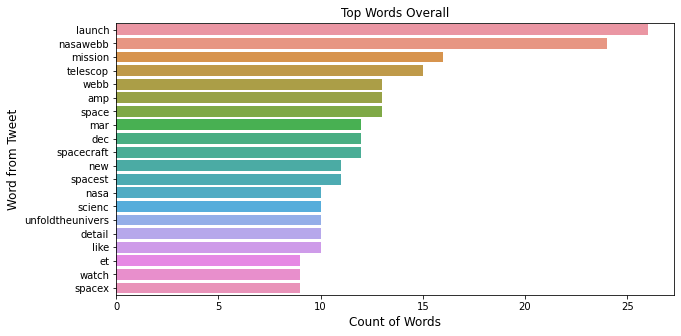

In [28]:
df2 = df2[:20, ]
plt.figure(figsize=(10, 5))
sns.barplot(df2.values, df2.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [29]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [18]:
str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns=['Word', 'Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


/home/cytech/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


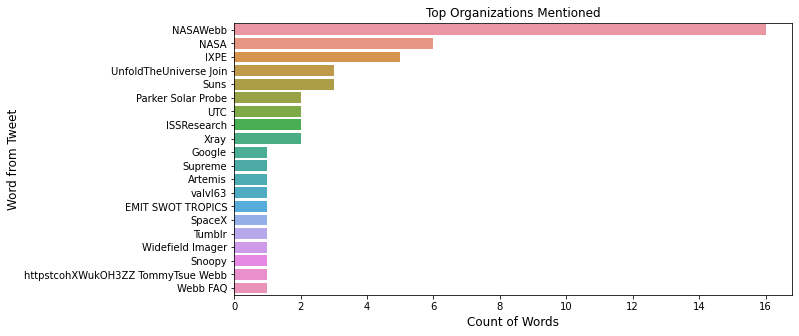

In [19]:
dfx = df7[:20, ]
plt.figure(figsize=(10, 5))
sns.barplot(dfx.values, dfx.index, alpha=1)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()


In [20]:
str1 = " "
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns=['Word', 'Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


/home/cytech/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


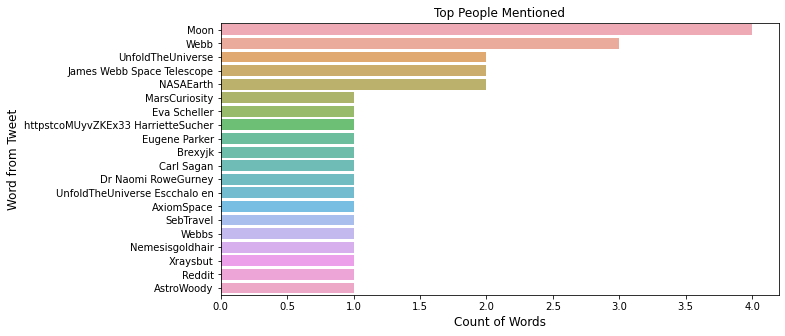

In [21]:
dfy = df11[:20, ]
plt.figure(figsize=(10, 5))
sns.barplot(dfy.values, dfy.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()
